In [1]:
# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential

In [3]:
import tensorflow_hub as hub

In [4]:
X=[]
Y=[]
IMG_SIZE=224
FLOWER_DAISY_DIR='Flower datasets/flowers/daisy'
FLOWER_SUNFLOWER_DIR='Flower datasets/flowers/sunflower'
FLOWER_TULIP_DIR='Flower datasets/flowers/tulip'
FLOWER_DANDI_DIR='Flower datasets/flowers/dandelion'
FLOWER_ROSE_DIR='Flower datasets/flowers/rose'

In [5]:
def assign_label(img,flower_type):
    return flower_type

In [6]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Y.append(str(label))

In [7]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
make_train_data('Rose',FLOWER_ROSE_DIR)
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
make_train_data('Tulip',FLOWER_TULIP_DIR)
make_train_data('Daisy',FLOWER_DAISY_DIR)

100%|██████████| 764/764 [00:04<00:00, 161.85it/s]


In [8]:
X=np.array(X)
X=X/255

In [33]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [17]:
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = to_categorical(Y,5)

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25 ,random_state = 42) 

In [21]:
num_classes = 5

In [22]:
m = tensorflow.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", output_shape=[1280],
                   trainable=False),  # Can be True, see below.
    tensorflow.keras.layers.Dense(num_classes, activation='softmax')
])

In [24]:
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [23]:
m.build([None, 224, 224, 3])

In [25]:
m.compile(optimizer= 'adam' ,loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
m.fit(x_train,y_train,epochs = 5)

Epoch 1/5
102/102 [==============================] - 170s 2s/step - loss: 0.7876 - accuracy: 0.7164
Epoch 2/5
102/102 [==============================] - 150s 1s/step - loss: 0.4238 - accuracy: 0.8597
Epoch 3/5
102/102 [==============================] - 142s 1s/step - loss: 0.3384 - accuracy: 0.8925
Epoch 4/5
102/102 [==============================] - 137s 1s/step - loss: 0.2896 - accuracy: 0.9058
Epoch 5/5
102/102 [==============================] - 151s 1s/step - loss: 0.2559 - accuracy: 0.9203


In [27]:
y_pred = m.predict(x_test)

In [28]:
pred_digits=np.argmax(y_pred,axis=1)

In [29]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break


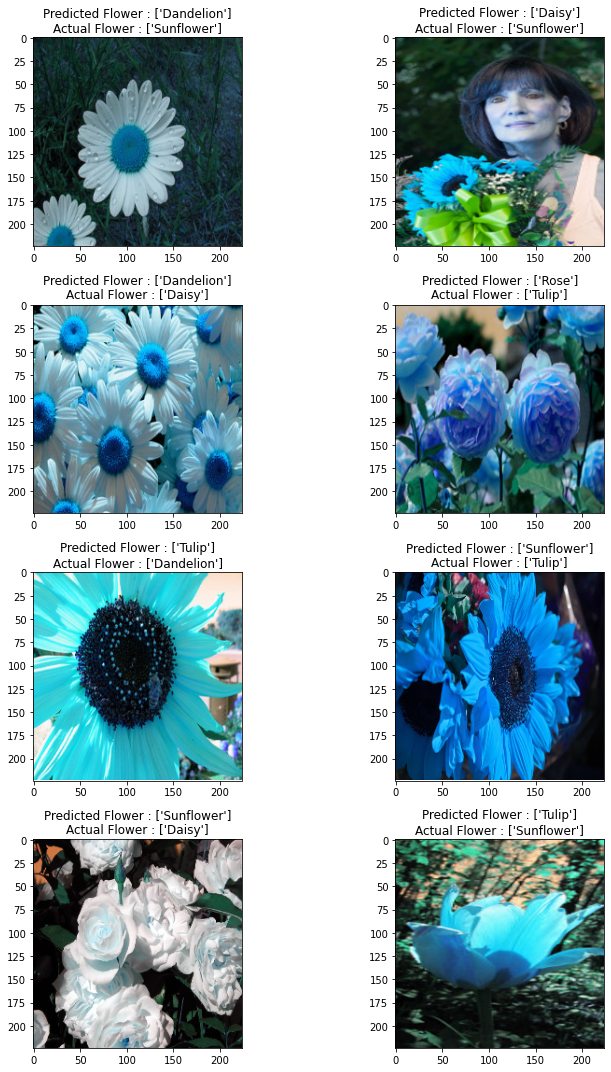

In [34]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax([y_test[mis_class[count]]])])))
        plt.tight_layout()
        count+=1


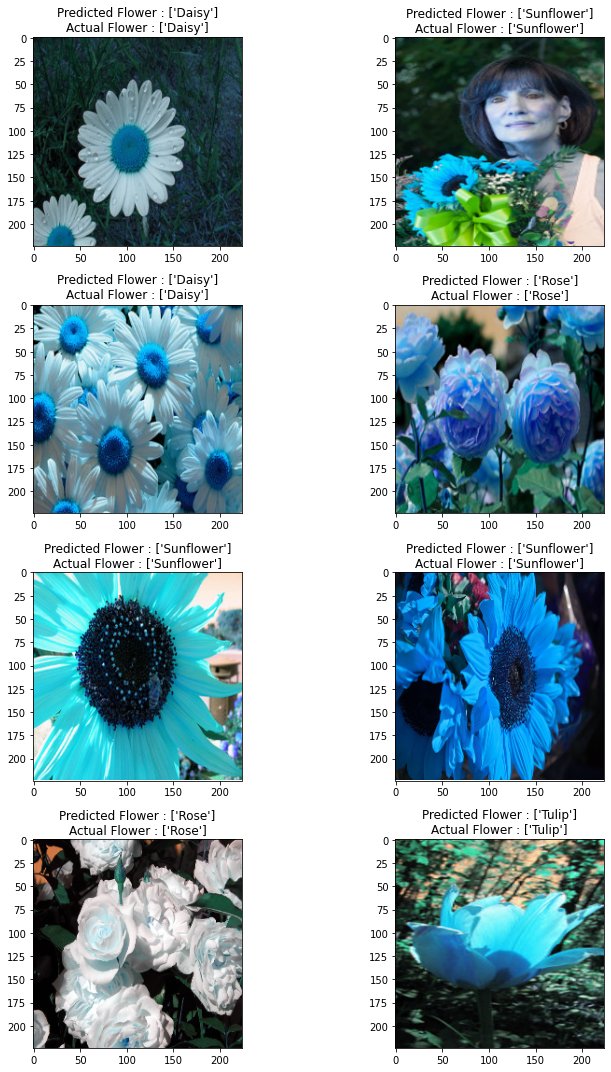

In [37]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax([y_test[prop_class[count]]])])))
        plt.tight_layout()
        count+=1